In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Set Seaborn style and a global color palette
sns.style="whitegrid"
sns.set_palette("Set2")


In [2]:
df = pd.read_csv('output_file_cui_final.csv') 

In [3]:
# Create new columns for mapping evaluation
df['Exact Match'] = (df['True CUI'].notna()) & (df['Predicted CUI'].notna()) & (df['True CUI'] == df['Predicted CUI'])
df['Predicted Only'] = df['Predicted CUI'].notna() & df['True CUI'].isna()
df['Ground Truth Only'] = df['True CUI'].notna() & df['Predicted CUI'].isna()
# Additional optional categories:
df['Mismatch'] = (df['True CUI'].notna()) & (df['Predicted CUI'].notna()) & (df['True CUI'] != df['Predicted CUI'])
df['No Mapping'] = (df['True CUI'].isna()) & (df['Predicted CUI'].isna())


In [4]:
# Summarize counts for mapping types
mapping_counts = {
    'Exact Match': df['Exact Match'].sum(),
    'Mismatch': df['Mismatch'].sum(),
    'Predicted Only': df['Predicted Only'].sum(),
    'Ground Truth Only': df['Ground Truth Only'].sum(),
    'No Mapping': df['No Mapping'].sum()
}

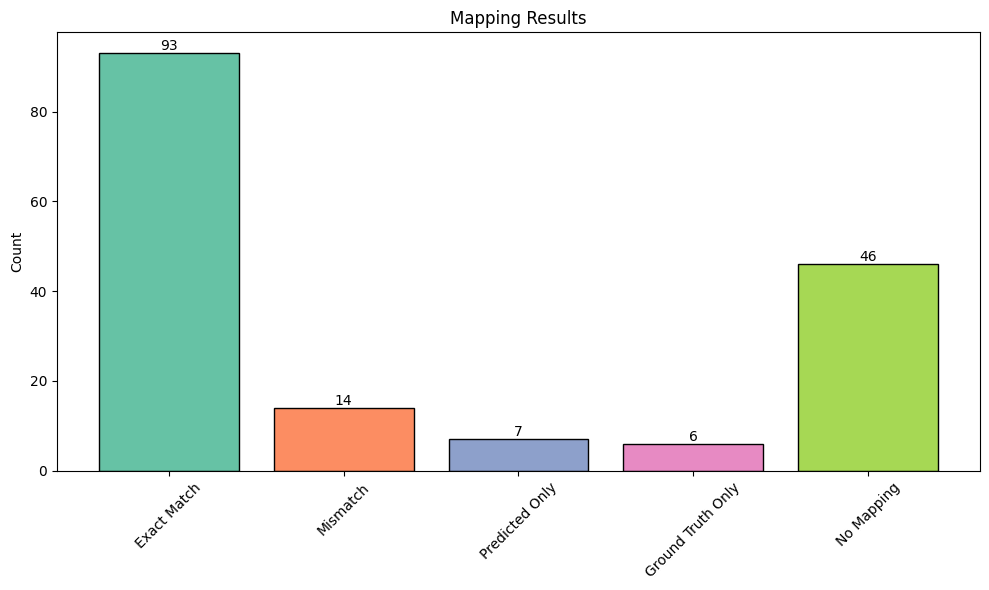

In [5]:
# Plot 1: Bar plot for mapping results using a Seaborn color palette
plt.figure(figsize=(10, 6))
# select the color
palette = sns.color_palette("Set2", n_colors=len(mapping_counts))
bars = plt.bar(mapping_counts.keys(), mapping_counts.values(), color=palette, edgecolor='black')
plt.ylabel('Count')
plt.title('Mapping Results')
plt.xticks(rotation=45)
plt.tight_layout()
# All count number on the bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'{int(height)}',
        ha='center', va='bottom', fontsize=10
    )
plt.show()

In [ ]:
# Plot 2: Distribution of Hallucination Score using a pastel color. 
# I have not get the Hallucination Score data, it will get error
plt.figure(figsize=(10, 6))
hist_color = sns.color_palette("pastel")[0]
plt.hist(df['Hallucination Score'].dropna(), bins=20, edgecolor='black', color=hist_color)
plt.xlabel('Hallucination Score')
plt.ylabel('Frequency')
plt.title('Distribution of Hallucination Score')
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

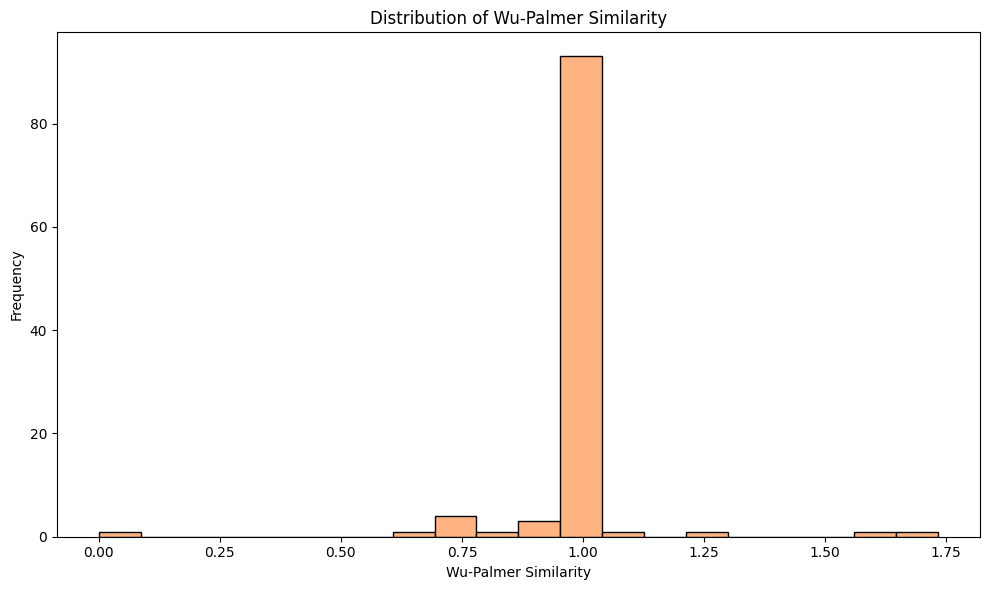

In [6]:
# Plot 3: Distribution of Wu-Palmer Similarity
plt.figure(figsize=(10, 6))
hist_color2 = sns.color_palette("pastel")[1]
plt.hist(df['Wu-Palmer Similarity'].dropna(), bins=20, edgecolor='black', color=hist_color2)
plt.xlabel('Wu-Palmer Similarity')
plt.ylabel('Frequency')
plt.title('Distribution of Wu-Palmer Similarity')
plt.tight_layout()
plt.show()

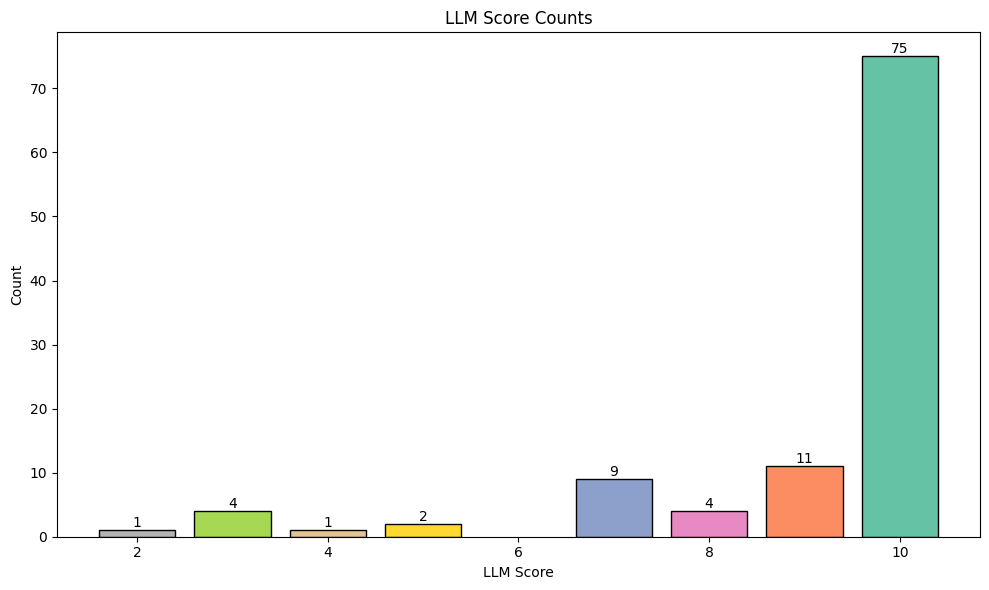

In [ ]:
# Plot 4: LLM Score counts (assumed categorical)
plt.figure(figsize=(10, 6))
llm_class_counts = df['LLM Score'].value_counts().sort_values(ascending=False)
palette_llm = sns.color_palette("Set2", n_colors=len(llm_class_counts))

bars = plt.bar(llm_class_counts.index, llm_class_counts.values, color=palette_llm, edgecolor='black')
plt.xlabel('LLM Score')
plt.ylabel('Count')
plt.title('LLM Score Counts')
plt.tight_layout()
# Show count number on the bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,height,f'{int(height)}',ha='center', va='bottom', fontsize=10)
plt.show()

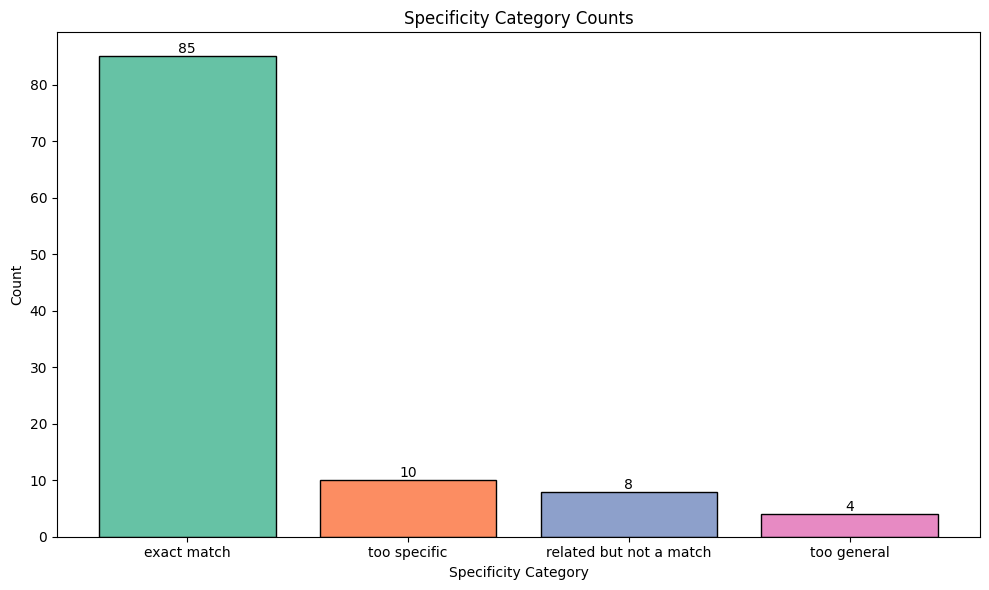

In [8]:
# Plot 5: Specificity LLM
plt.figure(figsize=(10, 6))
# Clearn the data
df['Specificity Category'] = df['Specificity Category'].str.strip('"').str.strip("'")
# Count the specificity label
specificity_counts = df['Specificity Category'].value_counts()
# Select the color
palette_spec = sns.color_palette("Set2", n_colors=len(specificity_counts))
bars = plt.bar(specificity_counts.index, specificity_counts.values, color=palette_spec, edgecolor='black')

plt.xlabel('Specificity Category')
plt.ylabel('Count')
plt.title('Specificity Category Counts')
plt.tight_layout()
# Show the count number on the bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center', va='bottom', fontsize=10
    )
plt.show()
